# COMP0188 - LAB 4

In this lab we will use character-based Recurrent Neural Network (RNN) to generate a Shakespeare's-like text based on the Shakespeare dataset from [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) blog post.

This exercise is a bit compute intensive so we recommend you to turn on your GPUs by going to 'Edit', 'Notebook settings' and in Harware Accelerator select 'GPU' from the drop menu.

In [1]:
# Import relevant packages 
import tensorflow as tf
import numpy as np
import os

In [2]:
# Access the data
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 
                                       'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')


1115394/1115394 [==============================] - 0s 0us/step


## Data Visualization

As always, let's start by visualizing the data. 

In [3]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read()
text = text.decode(encoding='utf-8')
print ('Total number of characters in the corpus is:', len(text))
print('The first 100 characters of the corpus are as follows:\n', text[:100])

Total number of characters in the corpus is: 1115394
The first 100 characters of the corpus are as follows:
 First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


## Data Processing

### Exercise 1 - Extract Unique Characters

First, extract a list of the unique characters in the text dataset. 

Hints:
1. You can think of a `str` as a list of characters.  
2. Look up the definition of a `set` in Python and how to get a list from that set. 

As a sanity check: You should get 65 unique characters in the dataset.

In [5]:
import typing
# The unique characters in the corpus
# We've defined the type to help you get started.  

### TASK 1 ###
# Get a set of unique characters in the text document
# YOUR CODE HERE:

vocab =

print ('The number of unique characters in the corpus is', len(vocab))
print('A sample of unique characters:', vocab[:10])

# Make a copy of the unique set elements in NumPy array format for later use in the decoding the predictions
idx2char = np.array(vocab)

The number of unique characters in the corpus is 65
A sample of unique characters: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3']


### 2- Tokenize Text Dataset

Our next step is to convert the text dataset to a sequence of 'int's to facilitate machine learning. This is also known as **tokenization**. Each int represents a **token**, which can be a full word, a sub-word, or a single character. In this notebook, a token is a **character**. 

In [6]:
char2idx = {u:i for i, u in enumerate(vocab)}
text_as_int = np.array([char2idx[c] for c in text])

# Creating the Dataset

We will now aggregate `text_as_int` into a dataset of 100-char sequences. 

In [7]:
# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int) 
seq_length = 100 # The max. length for single input

sequences = char_dataset.batch(seq_length, drop_remainder=True) 

We will visualize the first two sequences in this dataset: 

In [8]:
for i, seq in enumerate(sequences):
    print(seq)
    if i >= 1: break

tf.Tensor(
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59], shape=(100,), dtype=int64)
tf.Tensor(
[ 1 39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39 58 46 43 56
  1 58 53  1 42 47 43  1 58 46 39 52  1 58 53  1 44 39 51 47 57 46 12  0
  0 13 50 50 10  0 30 43 57 53 50 60 43 42  8  1 56 43 57 53 50 60 43 42
  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 18 47 56 57 58  6
  1 63 53 59], shape=(100,), dtype=int64)


### Next-Character Prediction

We will now set up the text prediction problem as one of predicting the next character, given all the characters already observed so far in each sequence. 

In [9]:
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text = chunk[1:]
  return input_text, target_text

dataset = sequences.map(split_input_target)

Under the hood, the RNN sequentially reads each character. As it reads the characters, it constructs a **summary** of the history of characters in its hidden state, and uses that to predict the next character: 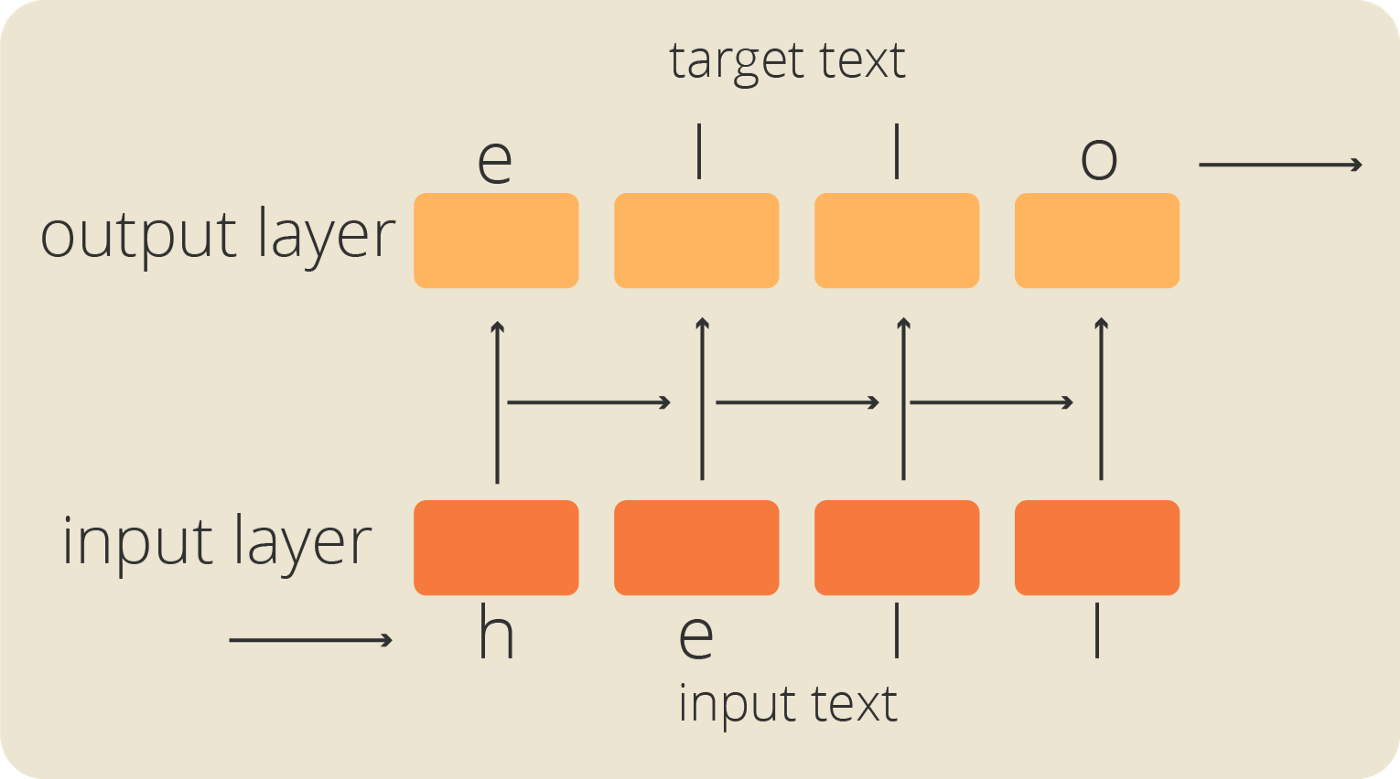

In [10]:

BUFFER_SIZE = 10000 # TF shuffles the data only within buffers

BATCH_SIZE = 64 # Batch size

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

print(dataset)

<BatchDataset element_spec=(TensorSpec(shape=(64, 99), dtype=tf.int64, name=None), TensorSpec(shape=(64, 99), dtype=tf.int64, name=None))>


# Building the Model

In [11]:
# Length of the vocabulary in chars
vocab_size = len(vocab)
# The embedding dimension
embedding_dim = 256
# Number of RNN units
rnn_units = 256

### Exercise 2 - Building the Model

There are three layers in our model:

 - An Embedding Layer: This layer serves as the input layer, accepting input tokens and converting them into vectors.
 - A GRU layer: An RNN layer filled with 1024 units. 
 - A Dense layer: Has (vocab_size) outputs, to predict the ID of the next character in the sequence. 

 Your task is to add the GRU layer to the model. 
 
 Hints:
 1. Look up the documentation for `tensorflow.keras.layers.GRU`. 
 2. Make sure the GRU can `return_sequence` and the GRU is `stateful`.
 3. Try the `glorot_uniform` initializer. 

In [12]:

### TASK 2 ###
# Build a recurrent neural network with an Embedding layer and a GRU (Gated Recurrent Units) layer

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
### YOUR CODE HERE ###
### Add the GRU layer


# Ading an LSTM layer, look into the different parameters it can take, is it using tanh() and sigmoid()
   

# Dense Layer for our model
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [13]:
model = build_model(
    vocab_size = len(vocab), # no. of unique characters
    embedding_dim=embedding_dim, # 256
    rnn_units=rnn_units, # 1024
    batch_size=BATCH_SIZE)  # 64 for the traning

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           16640     
                                                                 
 gru (GRU)                   (64, None, 256)           394752    
                                                                 
 lstm (LSTM)                 (64, None, 256)           525312    
                                                                 
 dense (Dense)               (64, None, 65)            16705     
                                                                 
Total params: 953,409
Trainable params: 953,409
Non-trainable params: 0
_________________________________________________________________


### Model Training

Now we're ready to train the model.
 
We define the loss function, compile the model, and call `model.fit`. 
We also make use of `CheckpointCallback` to save checkpoints along the way. 

In [14]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

# example_batch_loss  = loss(target_example_batch, example_batch_predictions)
# print("Prediction shape: ", example_batch_predictions.shape, " (batch_size, sequence_length, vocab_size)")
# print("scalar_loss:      ", example_batch_loss.numpy().mean())

model.compile(optimizer='adam', loss=loss)

In [15]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [16]:
EPOCHS = 1
history = model.fit(dataset, 
                    epochs=EPOCHS, 
                    callbacks=[checkpoint_callback])

174/174 [==============================] - 14s 22ms/step - loss: 2.7196


# Generating new text

Now we're ready to try generating new text from our saved model!

First, let's load the latest checkpoint. Tensorflow provides utilities to automatically find the latest checkpoint within `checkpoint_dir`. 

In [17]:
tf.train.latest_checkpoint(checkpoint_dir)


'./training_checkpoints/ckpt_1'

In [18]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 256)            16640     
                                                                 
 gru_1 (GRU)                 (1, None, 256)            394752    
                                                                 
 lstm_1 (LSTM)               (1, None, 256)            525312    
                                                                 
 dense_1 (Dense)             (1, None, 65)             16705     
                                                                 
Total params: 953,409
Trainable params: 953,409
Non-trainable params: 0
_________________________________________________________________


The process for sampling new text is as follows:
1. An RNN reads the existing (partial) sequence and predicts the next character. 
2. The output of the RNN is a 65-dimensional vector of scores for each character. A higher score indicates a higher probability of that character. 
3. The scores are converted to a **categorical distribution** over the characters. 
4. The categorical distribution is sampled to generate a character. 
5. The sampled character is appended to the sequence and we repeat from Sttep 1. 

In [25]:
def generate_text(model, num_generate, temperature, start_string):
  input_eval = [char2idx[s] for s in start_string] # string to numbers (vectorizing)
  input_eval = tf.expand_dims(input_eval, 0) # dimension expansion
  text_generated = [] # Empty string to store our results
  model.reset_states() # Clears the hidden states in the RNN

  for i in range(num_generate): #Run a loop for number of characters to generate
    predictions = model(input_eval) # prediction for single character
    predictions = tf.squeeze(predictions, 0) # remove the batch dimension

    # using a categorical distribution to predict the character returned by the model
    # higher temperature increases the probability of selecting a less likely character
    # lower --> more predictable
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    # The predicted character as the next input to the model
    # along with the previous hidden state
    # So the model makes the next prediction based on the previous character
    input_eval = tf.expand_dims([predicted_id], 0) 
    # Also devectorize the number and add to the generated text
    text_generated.append(idx2char[predicted_id]) 

  return (start_string + ' '.join(text_generated))

In [26]:
generated_text = generate_text(
                    model, 
                    num_generate=50, 
                    temperature=1, 
                    start_string="ROMEO")
print(generated_text)

ROMEOK N x ! 
 W C z a u l ;   w a l e   t h   t h o u   t h a m e . 
 
 H o m i s s - o t   w a n d   I


#### Exercise 3 - Experimentation

The character-level model we trained isn't very good. How can you improve it? 
Try one or more of the following: 

1. Training the model for more epochs
2. Adding one or more GRU layer to the model
3. Adding one or more LSTM layers to the model
4. Increasing the hidden units

In [ ]:
###  TASK 3  #####



### Exercise 4 - Deterministic Decoding vs Sampling

Recall that to generate text, in step 4, we sample the categorical distribution output by the RNN to generate the next character. Instead of sampling, it is possible to always pick the most likely character from the distribution, i.e. **deterministic decoding**. 

What are the pros and cons of the different approaches? Experiment with both methods and write down what you observe about the generated sequences.  